In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [172]:
df = pd.read_csv('adult.csv')

In [173]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age               5000 non-null object
workclass         5000 non-null object
fnlwgt            5000 non-null object
education         5000 non-null object
education_num     5000 non-null object
marital_status    5000 non-null object
occupation        5000 non-null object
relationship      5000 non-null object
race              5000 non-null object
sex               5000 non-null object
capital_gain      5000 non-null int64
capital_loss      5000 non-null int64
hours_per_week    5000 non-null int64
native_country    5000 non-null object
income            5000 non-null object
dtypes: int64(3), object(12)
memory usage: 351.6+ KB


In [88]:
df.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education_num     object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [174]:
columns = df.columns

In [175]:
columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [176]:
df = pd.DataFrame(np.where((df == '#NAME?'),np.nan,df))

In [177]:
df = pd.DataFrame(np.where((df == '?'),np.nan,df))

In [178]:
df.columns = columns

In [179]:
df.isna().sum()

age                48
workclass         331
fnlwgt            107
education          57
education_num      57
marital_status      0
occupation        331
relationship        0
race              264
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country     97
income              0
dtype: int64

In [180]:
df = df.dropna(subset=['fnlwgt'])

In [181]:
df.isna().sum()

age                47
workclass         322
fnlwgt              0
education          57
education_num      57
marital_status      0
occupation        322
relationship        0
race              256
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country     91
income              0
dtype: int64

In [182]:
df = df.drop(['education','race','native_country'],axis=1)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 0 to 4999
Data columns (total 12 columns):
age               4846 non-null object
workclass         4571 non-null object
fnlwgt            4893 non-null object
education_num     4836 non-null object
marital_status    4893 non-null object
occupation        4571 non-null object
relationship      4893 non-null object
sex               4846 non-null object
capital_gain      4893 non-null object
capital_loss      4893 non-null object
hours_per_week    4893 non-null object
income            4893 non-null object
dtypes: object(12)
memory usage: 267.6+ KB


In [184]:
df.dtypes

age               object
workclass         object
fnlwgt            object
education_num     object
marital_status    object
occupation        object
relationship      object
sex               object
capital_gain      object
capital_loss      object
hours_per_week    object
income            object
dtype: object

In [185]:
df['age'].dropna().astype('int').mean()

38.58728848534874

In [186]:
df['age']=df['age'].fillna(df['age'].dropna().astype('int').mean())

In [187]:
df.isna().sum()

age                 0
workclass         322
fnlwgt              0
education_num      57
marital_status      0
occupation        322
relationship        0
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
income              0
dtype: int64

In [188]:
df['age'] = df['age'].astype('int')

In [189]:
df.dtypes

age                int32
workclass         object
fnlwgt            object
education_num     object
marital_status    object
occupation        object
relationship      object
sex               object
capital_gain      object
capital_loss      object
hours_per_week    object
income            object
dtype: object

In [190]:
df['workclass'] = df['workclass'].fillna('others')

In [191]:
df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education_num      57
marital_status      0
occupation        322
relationship        0
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
income              0
dtype: int64

In [192]:
df['education_num'].value_counts()

9     1560
10    1088
13     810
14     242
11     210
7      196
12     160
6      141
4       94
15      84
5       73
16      54
8       53
3       42
2       22
1        7
Name: education_num, dtype: int64

In [193]:
df['education_num'] = df['education_num'].fillna('0')

In [194]:
df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education_num       0
marital_status      0
occupation        322
relationship        0
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
income              0
dtype: int64

In [195]:
df['occupation'] = df['occupation'].fillna('others')

In [196]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education_num      0
marital_status     0
occupation         0
relationship       0
sex               47
capital_gain       0
capital_loss       0
hours_per_week     0
income             0
dtype: int64

In [197]:
df['relationship'].value_counts()

Husband           1958
Not-in-family     1273
Own-child          750
Unmarried          530
Wife               238
Other-relative     144
Name: relationship, dtype: int64

In [198]:
def encode_relationship(cols):
    rel = cols[0]
    if rel == 'Husband':
        return(1)
    elif rel == 'Wife':
        return(2)
    elif rel == 'Unmarried':
        return(3)
    elif rel == 'Not-in-family':
        return(4)
    elif rel == 'Own-child':
        return(5)
    elif rel == 'Other-relative':
        return(6)

In [202]:
df['relationship'] = df[['relationship']].apply(encode_relationship,axis=1)

In [203]:
df['relationship'].value_counts()

1    1958
4    1273
5     750
3     530
2     238
6     144
Name: relationship, dtype: int64

In [204]:
df['sex'].value_counts()

Male      3259
Female    1587
Name: sex, dtype: int64

In [210]:
df['sex'] = np.where((df['relationship'] == 1) & df['sex'].isna(),'Male',df['sex'])

In [211]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education_num      0
marital_status     0
occupation         0
relationship       0
sex               24
capital_gain       0
capital_loss       0
hours_per_week     0
income             0
dtype: int64

In [212]:
df['sex'] = np.where((df['relationship'] == 2) & df['sex'].isna(),'Female',df['sex'])

In [213]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education_num      0
marital_status     0
occupation         0
relationship       0
sex               23
capital_gain       0
capital_loss       0
hours_per_week     0
income             0
dtype: int64

In [222]:
((df['relationship'] == 5) & df['sex'].isna()).sum()

7

In [223]:
df['sex'] = df['sex'].fillna(0)

In [224]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income            0
dtype: int64

In [226]:
df['sex'] = np.where((df['sex'] == 'Male'),1,df['sex'])

In [227]:
df['sex'] = np.where((df['sex'] == 'Female'),2,df['sex'])

In [228]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income            0
dtype: int64

In [229]:
df.dtypes

age                int32
workclass         object
fnlwgt            object
education_num     object
marital_status    object
occupation        object
relationship       int64
sex               object
capital_gain      object
capital_loss      object
hours_per_week    object
income            object
dtype: object

In [231]:
df['workclass'].value_counts()

Private             3361
Self-emp-not-inc     374
others               322
Local-gov            322
State-gov            191
Self-emp-inc         177
Federal-gov          145
Without-pay            1
Name: workclass, dtype: int64

In [241]:
df = pd.get_dummies(df,columns=['workclass','marital_status','occupation'])

In [242]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'workclass_others', 'marital_status_Divorced',
       'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-

In [243]:
df.dtypes

age                                      int32
fnlwgt                                  object
education_num                           object
relationship                             int64
sex                                     object
capital_gain                            object
capital_loss                            object
hours_per_week                          object
income                                  object
workclass_Federal-gov                    uint8
workclass_Local-gov                      uint8
workclass_Private                        uint8
workclass_Self-emp-inc                   uint8
workclass_Self-emp-not-inc               uint8
workclass_State-gov                      uint8
workclass_Without-pay                    uint8
workclass_others                         uint8
marital_status_Divorced                  uint8
marital_status_Married-AF-spouse         uint8
marital_status_Married-civ-spouse        uint8
marital_status_Married-spouse-absent     uint8
marital_statu

In [247]:
df['sex']=df['sex'].astype('category')

In [255]:
for v in ['fnlwgt','capital_gain','capital_loss','hours_per_week','education_num']:
    df[v] = df[v].astype('int64')

In [257]:
for v in ['education_num','relationship',]:
    df[v] = df[v].astype('category')

In [258]:
df.dtypes

age                                        int32
fnlwgt                                     int64
education_num                           category
relationship                            category
sex                                     category
capital_gain                               int64
capital_loss                               int64
hours_per_week                             int64
income                                    object
workclass_Federal-gov                      uint8
workclass_Local-gov                        uint8
workclass_Private                          uint8
workclass_Self-emp-inc                     uint8
workclass_Self-emp-not-inc                 uint8
workclass_State-gov                        uint8
workclass_Without-pay                      uint8
workclass_others                           uint8
marital_status_Divorced                    uint8
marital_status_Married-AF-spouse           uint8
marital_status_Married-civ-spouse          uint8
marital_status_Marri

In [259]:
df['income'].value_counts()

<=50K    3701
>50K     1192
Name: income, dtype: int64

In [261]:
df['income'] = np.where(df['income'] == '<=50K',0,1)

In [262]:
df.dtypes

age                                        int32
fnlwgt                                     int64
education_num                           category
relationship                            category
sex                                     category
capital_gain                               int64
capital_loss                               int64
hours_per_week                             int64
income                                     int32
workclass_Federal-gov                      uint8
workclass_Local-gov                        uint8
workclass_Private                          uint8
workclass_Self-emp-inc                     uint8
workclass_Self-emp-not-inc                 uint8
workclass_State-gov                        uint8
workclass_Without-pay                      uint8
workclass_others                           uint8
marital_status_Divorced                    uint8
marital_status_Married-AF-spouse           uint8
marital_status_Married-civ-spouse          uint8
marital_status_Marri

### Build Model

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [266]:
X_train,X_test,y_train,y_test = train_test_split(
                                df.drop('income',axis=1),
                                df['income'], 
                                test_size=0.2,
                                random_state=101)

In [268]:
X_train.shape

(3914, 38)

In [269]:
X_test.shape

(979, 38)

In [270]:
y_train.shape

(3914,)

In [271]:
y_test.shape

(979,)

### Logistic

In [272]:
log = LogisticRegression()

In [274]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [275]:
predict_log = log.predict(X_test)

In [276]:
print(accuracy_score(y_test,predict_log))
print(confusion_matrix(y_test,predict_log))
print(classification_report(y_test,predict_log))

0.8089887640449438
[[731  22]
 [165  61]]
             precision    recall  f1-score   support

          0       0.82      0.97      0.89       753
          1       0.73      0.27      0.39       226

avg / total       0.80      0.81      0.77       979



In [277]:
pred_prob = log.predict_proba(X_test)

In [298]:
pred_db = np.where(pred_prob[:,0]>=0.5,0,1)

In [299]:
print(accuracy_score(y_test,pred_db))
print(confusion_matrix(y_test,pred_db))
print(classification_report(y_test,pred_db))

0.8089887640449438
[[731  22]
 [165  61]]
             precision    recall  f1-score   support

          0       0.82      0.97      0.89       753
          1       0.73      0.27      0.39       226

avg / total       0.80      0.81      0.77       979



### Decision Tree

In [300]:
from sklearn.tree import DecisionTreeClassifier

In [302]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, pred_dt))

0.8008171603677222


In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
def fit_predict(train, test, y_train, y_test, scaler, max_depth, 
                criterion = 'entropy', max_features = 1, min_samples_split = 4):
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)        
    dt = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, 
                                random_state=42, max_features=max_features,
                               min_samples_split=min_samples_split)
    dt.fit(train_scaled, y_train)
    y_pred = dt.predict(test_scaled)
    print(accuracy_score(y_test, y_pred))

### Max depth tuning

In [305]:
for i in range(1, 20):
    print('Accuracy score using max_depth =', i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), i)

Accuracy score using max_depth = 1: 0.7691521961184883
Accuracy score using max_depth = 2: 0.7691521961184883
Accuracy score using max_depth = 3: 0.7691521961184883
Accuracy score using max_depth = 4: 0.7701736465781409
Accuracy score using max_depth = 5: 0.7967313585291114
Accuracy score using max_depth = 6: 0.7967313585291114
Accuracy score using max_depth = 7: 0.8018386108273748
Accuracy score using max_depth = 8: 0.7793667007150153
Accuracy score using max_depth = 9: 0.7987742594484167
Accuracy score using max_depth = 10: 0.7895812053115424
Accuracy score using max_depth = 11: 0.832482124616956
Accuracy score using max_depth = 12: 0.7967313585291114
Accuracy score using max_depth = 13: 0.8140960163432074
Accuracy score using max_depth = 14: 0.8253319713993871
Accuracy score using max_depth = 15: 0.8314606741573034
Accuracy score using max_depth = 16: 0.8161389172625128
Accuracy score using max_depth = 17: 0.8140960163432074
Accuracy score using max_depth = 18: 0.8100102145045965
Ac

### Max feautres tuning

In [308]:
for i in np.arange(0.1, 1.0, 0.1):
    print('Accuracy score using max features =', i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 
                max_depth = 11, 
                max_features=i)

Accuracy score using max features = 0.1: 0.8243105209397344
Accuracy score using max features = 0.2: 0.8365679264555669
Accuracy score using max features = 0.30000000000000004: 0.8335035750766088
Accuracy score using max features = 0.4: 0.8406537282941777
Accuracy score using max features = 0.5: 0.8386108273748724
Accuracy score using max features = 0.6: 0.8345250255362615
Accuracy score using max features = 0.7000000000000001: 0.8478038815117467
Accuracy score using max features = 0.8: 0.8406537282941777
Accuracy score using max features = 0.9: 0.8447395301327886


### Max samples split tuning

In [310]:
for i in range(2, 10):
    print('Accuracy score using min samples split =', i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 
                max_depth = 11, 
                max_features=0.9, 
                min_samples_split=i)

Accuracy score using min samples split = 2: 0.8426966292134831
Accuracy score using min samples split = 3: 0.8437180796731358
Accuracy score using min samples split = 4: 0.8447395301327886
Accuracy score using min samples split = 5: 0.8386108273748724
Accuracy score using min samples split = 6: 0.8447395301327886
Accuracy score using min samples split = 7: 0.8457609805924413
Accuracy score using min samples split = 8: 0.8488253319713994
Accuracy score using min samples split = 9: 0.8488253319713994


### Criterion tuning

In [311]:
for i in ['gini', 'entropy']:
    print('Accuracy score using criterion =', i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), 
                max_depth = 11, 
                max_features=0.9, 
                min_samples_split=8, 
                criterion = i)

Accuracy score using criterion = gini: 0.832482124616956
Accuracy score using criterion = entropy: 0.8488253319713994


### Increse the degree of non-linearity

In [315]:
from sklearn.preprocessing import PolynomialFeatures

In [314]:
def create_poly(train,test,degree):
    poly = PolynomialFeatures(degree=degree)
    train_poly = poly.fit_transform(train)
    test_poly = poly.fit_transform(test)
    return train_poly,test_poly

In [317]:
for degree in [1,2]:
    train_poly, test_poly = create_poly(X_train, X_test, degree)
    print('Polynomial degree',degree)
    fit_predict(train_poly,test_poly, y_train, y_test, StandardScaler(), 
                max_depth = 11, 
                max_features=0.9, 
                min_samples_split=8, 
                criterion = 'entropy')
    print(10*'-')

Polynomial degree 1
0.8345250255362615
----------
Polynomial degree 2
0.8355464759959143
----------


### Random Forest

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [320]:
rf = RandomForestClassifier(criterion='gini',oob_score=True)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,pred_rf))

0.8467824310520939


C:\Simhan\Q\Platform\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Simhan\Q\Platform\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


### GridSearchCV

In [321]:
from sklearn.model_selection import GridSearchCV

In [322]:
params = {'n_estimators':[200,500,700],'max_depth':[5,10,15,18,20],
         'min_samples_leaf':[3,5,8]}

In [323]:
gs = GridSearchCV(rf,params,verbose=3)

In [324]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] max_depth=5, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=200, score=0.8513409961685824, total=   0.8s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=200 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=3, n_estimators=200, score=0.842911877394636, total=   0.6s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=200 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=3, n_estimators=200, score=0.8443251533742331, total=   0.8s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=500, score=0.849808429118774, total=   2.1s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=500, score=0.8475095785440613, total=   1.8s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=500, score=0.8374233128834356, total=   1.7s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=700 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=700, score=0.8505747126436781, total=   2.5s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=700 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=700, score=0.8467432950191571, total=   2.9s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=700 .........

[CV]  max_depth=10, min_samples_leaf=8, n_estimators=700, score=0.8528735632183908, total=   3.8s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=700 ..............
[CV]  max_depth=10, min_samples_leaf=8, n_estimators=700, score=0.8513409961685824, total=   3.4s
[CV] max_depth=10, min_samples_leaf=8, n_estimators=700 ..............
[CV]  max_depth=10, min_samples_leaf=8, n_estimators=700, score=0.8404907975460123, total=   3.0s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=200, score=0.8513409961685824, total=   0.9s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=200, score=0.8482758620689655, total=   0.9s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=200, score=0.8404907975460123, total=   0.9s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=500 .

[CV]  max_depth=18, min_samples_leaf=8, n_estimators=200, score=0.8521072796934865, total=   0.8s
[CV] max_depth=18, min_samples_leaf=8, n_estimators=200 ..............
[CV]  max_depth=18, min_samples_leaf=8, n_estimators=200, score=0.8381901840490797, total=   0.8s
[CV] max_depth=18, min_samples_leaf=8, n_estimators=500 ..............
[CV]  max_depth=18, min_samples_leaf=8, n_estimators=500, score=0.8521072796934865, total=   2.2s
[CV] max_depth=18, min_samples_leaf=8, n_estimators=500 ..............
[CV]  max_depth=18, min_samples_leaf=8, n_estimators=500, score=0.8536398467432951, total=   2.2s
[CV] max_depth=18, min_samples_leaf=8, n_estimators=500 ..............
[CV]  max_depth=18, min_samples_leaf=8, n_estimators=500, score=0.8358895705521472, total=   2.3s
[CV] max_depth=18, min_samples_leaf=8, n_estimators=700 ..............
[CV]  max_depth=18, min_samples_leaf=8, n_estimators=700, score=0.8544061302681992, total=   3.1s
[CV] max_depth=18, min_samples_leaf=8, n_estimators=700 .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  5.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 700], 'max_depth': [5, 10, 15, 18, 20], 'min_samples_leaf': [3, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [325]:
gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 700}

In [326]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [327]:
rf1 = gs.best_estimator_

In [328]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [329]:
rf1.oob_score_

0.8520694941236586

In [330]:
rf.oob_score_

0.8150229943791517

In [332]:
pred_rf1 = rf1.predict(X_test)

In [333]:
print(accuracy_score(y_test,pred_rf1))

0.8580183861082737


In [334]:
rf1.feature_importances_

array([8.71602484e-02, 3.84805461e-02, 1.20355179e-01, 1.58110268e-01,
       1.74920194e-02, 1.55692848e-01, 3.36436500e-02, 5.27369313e-02,
       2.77551658e-03, 1.81189266e-03, 4.58369849e-03, 1.11132467e-02,
       5.74136394e-03, 1.34921877e-03, 0.00000000e+00, 1.21731094e-03,
       8.87771952e-03, 1.50882822e-05, 1.65448163e-01, 4.40976350e-04,
       4.65275242e-02, 9.80750901e-04, 1.50828205e-03, 3.04108725e-03,
       0.00000000e+00, 2.59981054e-03, 2.87478075e-02, 5.27215756e-03,
       1.27173262e-03, 3.76387320e-03, 6.28951685e-03, 1.13217697e-06,
       2.21901432e-02, 9.23747202e-04, 3.93581451e-03, 2.87804676e-03,
       1.74867266e-03, 1.27401562e-03])

### KNN

In [335]:
from sklearn.neighbors import KNeighborsClassifier

In [336]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('income',axis=1))

In [337]:
scaled_features

array([[ 0.0309612 , -1.06470593,  1.10743143, ..., -0.16908414,
        -0.22909475, -0.26541308],
       [ 0.84504265, -1.01032538,  1.10743143, ..., -0.16908414,
        -0.22909475, -0.26541308],
       [-0.0430462 ,  0.23151224, -0.35145313, ..., -0.16908414,
        -0.22909475, -0.26541308],
       ...,
       [ 0.62302044,  0.1984241 , -0.35145313, ..., -0.16908414,
        -0.22909475, -0.26541308],
       [-0.0430462 ,  0.51522947, -0.35145313, ..., -0.16908414,
        -0.22909475, -0.26541308],
       [ 1.43710189, -1.27649444,  0.01326801, ..., -0.16908414,
        -0.22909475, -0.26541308]])

In [338]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,fnlwgt,education_num,relationship,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.030961,-1.064706,1.107431,0.720001,-0.671396,0.157878,-0.22756,-0.043560,-0.174755,-0.265413,...,-0.203733,-0.257382,-0.331704,-0.060764,-0.377037,-0.134545,-0.363836,-0.169084,-0.229095,-0.265413
1,0.845043,-1.010325,1.107431,-1.089122,-0.671396,-0.147346,-0.22756,-2.271504,-0.174755,-0.265413,...,-0.203733,-0.257382,-0.331704,-0.060764,-0.377037,-0.134545,-0.363836,-0.169084,-0.229095,-0.265413
2,-0.043046,0.231512,-0.351453,0.720001,-0.671396,-0.147346,-0.22756,-0.043560,-0.174755,-0.265413,...,4.908392,-0.257382,-0.331704,-0.060764,-0.377037,-0.134545,-0.363836,-0.169084,-0.229095,-0.265413
3,1.067065,0.410513,-1.080895,-1.089122,-0.671396,-0.147346,-0.22756,-0.043560,-0.174755,-0.265413,...,4.908392,-0.257382,-0.331704,-0.060764,-0.377037,-0.134545,-0.363836,-0.169084,-0.229095,-0.265413
4,-0.783120,1.383526,1.107431,-0.486081,1.427735,-0.147346,-0.22756,-0.043560,-0.174755,-0.265413,...,-0.203733,-0.257382,-0.331704,-0.060764,2.652260,-0.134545,-0.363836,-0.169084,-0.229095,-0.265413


In [339]:
XS_train,XS_test,y_train,y_test = train_test_split(scaled_features,df['income'],
                                test_size=0.2,
                                random_state=101)

In [340]:
error_rate = []
for i in range(1,40,1):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(XS_train,y_train)
    pred_knn_i = knn_i.predict(XS_test)
    error_rate.append(np.mean(pred_knn_i != y_test))

Text(0,0.5,'Error Rate')

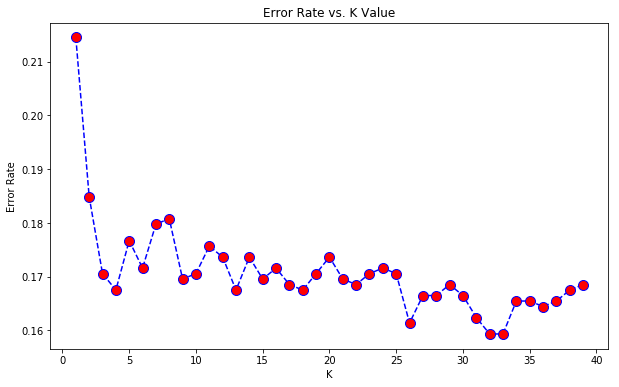

In [341]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [348]:
knn32 = KNeighborsClassifier(n_neighbors=32)
knn32.fit(XS_train,y_train)
pred_knn32 = knn32.predict(XS_test)

In [349]:
print(accuracy_score(y_test,pred_knn32))

0.8406537282941777
